# Assignment 2

Name: Max Yuhas <br>
Professor: Smita Krishnaswamy <br>

## Problem 1

### Part 1 - Geometric Gradient Descent 1D

2D Gradient descent is visualized in Nielsen Chapter 1 as a bowl-shaped cost function, $C(v_1,v_2)$, floating in the $C$ dimension above the $v_1$,$v_2$ plane (our 2 predictor dimensions and the third $C$ dimension indicates the cost function). If we were to take a vertical slice of this cost function (shown below) we would see a parabolic cost function in terms of just $v_1$, this represents the 1D case of the cost function. Gradient descent here would still be to move each step in the negative direction of the gradient using the follow algorithm (where $\eta$ is the step size):
$$ v \rightarrow v' - \eta \frac{\partial C}{\partial v_1} $$
Note that even though we are only moving the partial derivative direciton of one variable, since this is a funciton of only one variable this is still full gradient descent not stochastic gradient descent. This means we are just moving down the parabola at step size $\eta$. It is important to see here that if $\eta$ remains too large, then we will not reach the minimum but instead oscillate around it. It is best to have $\eta$ incrementally decrease in size based on which the number of iterations of gradient descent that have been performed, so we are greedy to begin our search for a minima, but more conservative overtime to avoid continuous oscillation.

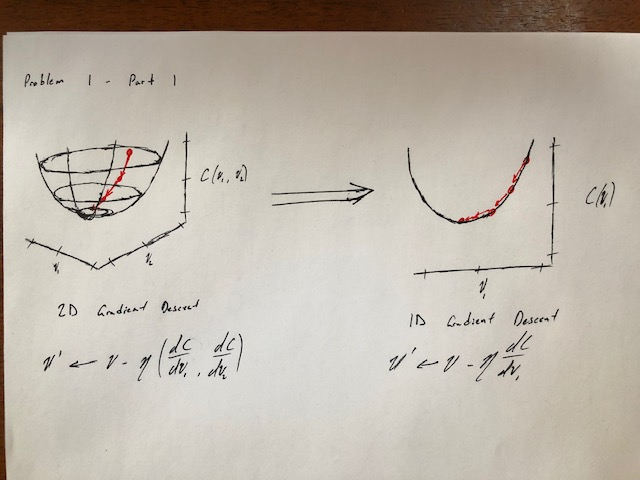

In [1]:
from IPython.display import display, Image
display(Image(filename='1D_GradDescent.png'))

### Part 2 - Online Learning vs Mini-Batch SGD

Positives for online learning include constantly updating the weights and biases in our model and higher likelyhood of avoiding local minima because the gradient for each individual point can be "noisy" and not necessarily move directly towards a minima at each individual iteration. However, calculating the gradient so frequently can be computationally expensive, especially for extremely large datasets. Additionally, these "noisy" gradients may take it longer to approach the minima (local or global) of the cost function.

Mini-batch stochastic gradient descent (with say 20 points) is much more compuationally efficient than online learning. Also, by averaging or summing individual gradients for each of the 20 points, we avoid the "noisy" nature of online learning. This can make it faster to approach a minima, but may make it more likely to be stuck in a local minima. This example we have a set mini-batch size, but in general we would also need to determine what is the best size of a mini-batch to use as an additional hyperparameter.

### Part 3 - 2 Layer MNIST Classifier

I built this using the TensorFlow tutorial that Matthew Amodio went over in the TensorFlow info session.
The code is available here (https://adventuresinmachinelearning.com/python-tensorflow-tutorial/). I adapted the code to exclude the hidden layer, making just the 2 layer network.

The problem description in the assignment PDF did not specify how many epochs to train for, so I chose to just run for a quick 10.

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.5
epochs = 10
batch_size = 50

# input layer (28 x 28 pixels = 784)
x = tf.placeholder(tf.float32, [None, 784])
# 10 units output layer
y = tf.placeholder(tf.float32, [None, 10])

#Randomly initialize weights and biases, they W is 784x10 and b is 10x1
W = tf.Variable(tf.random_normal([784, 10]), name='W')
b = tf.Variable(tf.random_normal([10]), name='b')

#We have no hidden layer so our output is just y=softmax(Wx+b)
y_out = tf.nn.softmax(tf.add(tf.matmul(x, W), b))
#truncate output values to eliminate any potentially weird outputs
y_clipped = tf.clip_by_value(y_out, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# Define accuracy measurement, just if the outputs are the correct digit (True or False)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
#start the session
with tf.Session() as sess:
    # initialize the variables
    sess.run(init_op)
    #Number of total batches is the number of train images divided by batch size.
    total_batch = int(len(mnist.train.labels) / batch_size)
    #Store the costs at each epoch
    costs = [0]*10
    for epoch in range(epochs):
        #always initialize avg_cost as zero
        avg_cost = 0
        for i in range(total_batch):
            #split each batch into the x and y values
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            #train
            _, c = sess.run([optimizer, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            #update the avg_cost for the epoch
            avg_cost += c / total_batch
        costs[epoch] = avg_cost
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
    print("Accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 1.479
Epoch: 2 cost = 0.819
Epoch: 3 cost = 0.713
Epoch: 4 cost = 0.670
Epoch: 5 cost = 0.635
Epoch: 6 cost = 0.608
Epoch: 7 cost = 0.589
Epoch: 8 cost = 0.568
Epoch: 9 cost = 0.563
Epoch: 10 cost = 0.548
Accuracy: 0.9148


I cannot figure out how to set a random seed in TensorFlow such that my results are consistent every time they are run. However, the cost always begins around 1.450 and then will continue decrease in a decreasing manner down to around 0.550. The accuracy is consistently around 91%. This seems like a very good accuracy rate for a neural network trained in less than 30 seconds over only 10 epochs and with no hidden layers.
In this particular iteration, the training cost decreased from 1.479 to 0.548 over 10 epochs and resulted in a test accuracy of 0.9148.

## Problem 2

### Part 1 - Alternative view of backpropagation

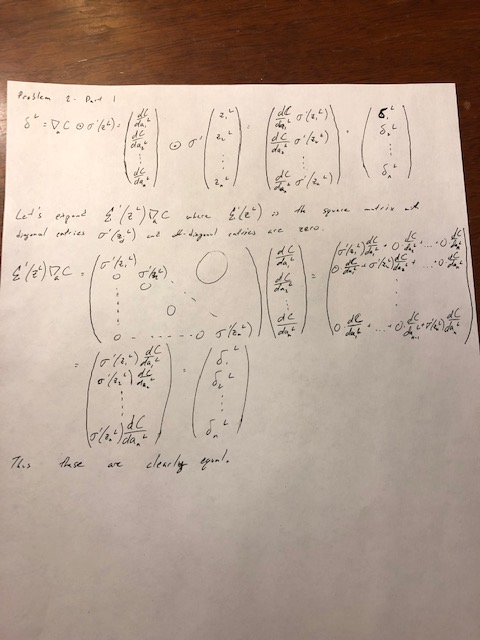

In [5]:
display(Image(filename='Prob2Part1.png'))

### Part 2 - More of the alternative view of backpropagation

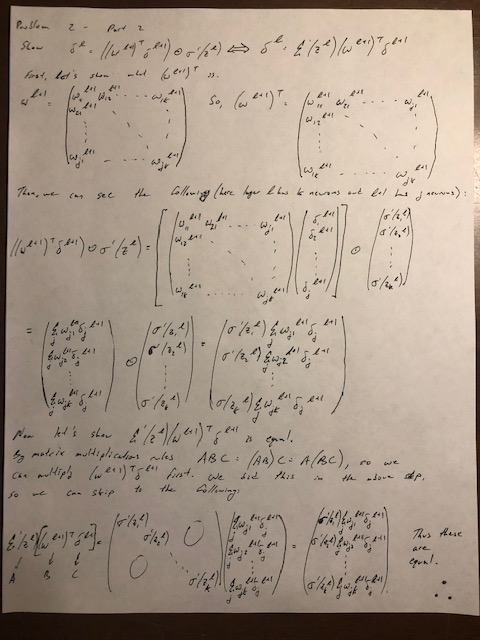

In [6]:
display(Image(filename='Prob2Part2.png'))

### Part 3 -  Putting together parts 1 and 2

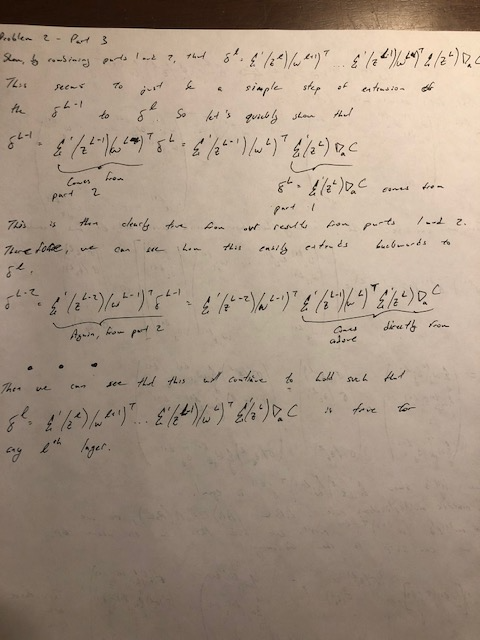

In [7]:
display(Image(filename='Prob2Part3.png'))

### Part 4 - Do it all without the sigmoid activation

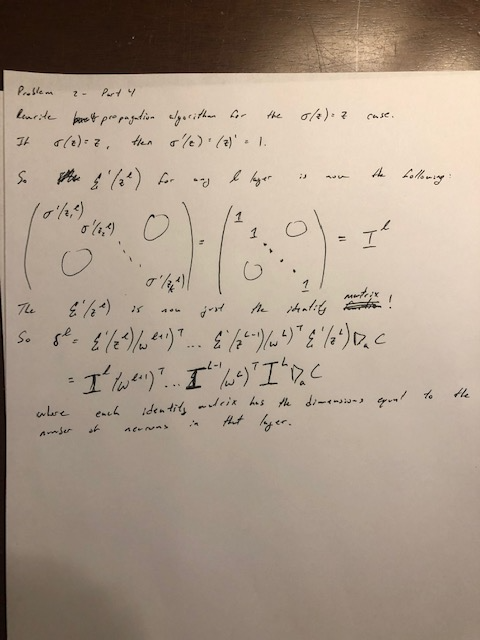

In [8]:
display(Image(filename='Prob2Part4.png'))

## Problem 3

### Part 1 - Understanding cross-entropy loss

For the incorrect cross-entropy loss $-[aln(y)+(1-a)ln(1-y)]$, if y=0 or y=1 there are problems of undetermined values for the cross-entropy loss. This would result in either the first or second logarithm term to be equal to $ln(0)$ which has a nonexistent value and thus will result in a nonexistent cross-entropy loss. Using this to evaluate our neural network just plainly will not work. This will not have the same effect on the correct cross-entropy equation $-[yln(a)+(1-y)ln(1-a)]$. We will get one of the two terms equal to zero, but will not get an undetermined values such as ln(0).

### Part 2 - Minimizing cross-entropy loss

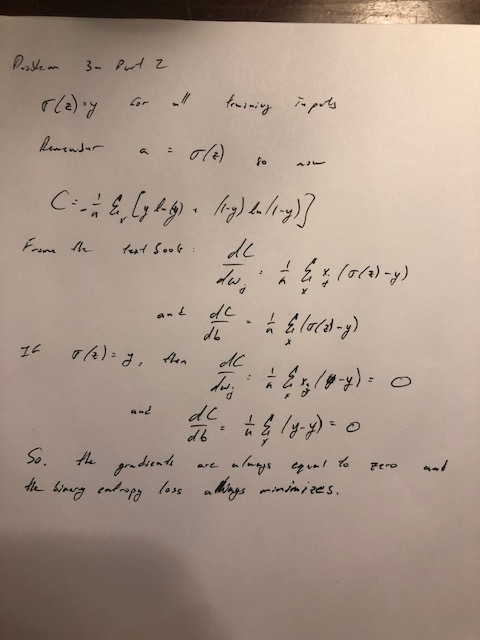

In [9]:
display(Image(filename='Prob3Part2.png'))

### Part 3 - Cross-entropy calculations

I did not use the sigmoid activation function, it was not clear whether we were supposed to or not. So I solve for the derivatives of the cost function with respect to the weights and biases using the $\sigma(z)=z$ activation function.

Notationally, dWl_jk and dbl_j below are equivalent to $\frac{\partial{C}}{\partial{w^l_jk}}$ and $\frac{\partial{C}}{\partial{b^l_j}}$ from the Nielsen textbook respectively.

In [10]:
#initialize our weights, biases, x values, y values
W1 = np.array([[.15,.20],[.25,.30]])
W2 = np.array([[.40,.45],[.50,.55]])
b1 = np.array([0.35,0.35])
b2 = np.array([0.6,0.6])
x = np.array([0.05,0.1])
y = np.array([0.01,0.99])

hiddenlayer = np.dot(x,W1)+b1
output = np.dot(hiddenlayer,W2)+b2

In [11]:
error2 = output-y #from equation BP1 in chapter 2
#Calculate dC/db for each bias in the final layer, using BP3
db2_1 = error2[0]
db2_2 = error2[1]
#Calculate dC/dW for each weight in the final layer, using BP4
dW2_11 = hiddenlayer[0]*error2[0]
dW2_12 = hiddenlayer[1]*error2[0]
dW2_21 = hiddenlayer[0]*error2[1]
dW2_22 = hiddenlayer[1]*error2[1]

error1 = np.dot(W2.T,error2) #from equation BP2
#Calculate dC/db for each bias in the hidden layer, using BP3
db1_1 = error1[0]
db1_2 = error1[1]
#Calculate dC/dW for each weight in the hidden layer, using BP4
dW1_11 = x[0]*error1[0]
dW1_12 = x[1]*error1[0]
dW1_21 = x[0]*error1[1]
dW1_22 = x[1]*error1[1]

In [12]:
print("Derivatives of cost wrt biases and weights for final layer:")
print("db2_1 = ",db2_1)
print("db2_2 = ",db2_2)
print("dW2_11 = ",dW2_11)
print("dW2_12 = ",dW2_12)
print("dW2_21 = ",dW2_21)
print("dW2_22 = ",dW2_22)

Derivatives of cost wrt biases and weights for final layer:
db2_1 =  0.938
db2_2 =  -0.003375000000000128
dW2_11 =  0.3587849999999999
dW2_12 =  0.3658199999999999
dW2_21 =  -0.0012909375000000488
dW2_22 =  -0.0013162500000000498


In [13]:
print("Derivatives of cost wrt biases and weights for hidden layer:")
print("db1_1 = ",db1_1)
print("db1_2 = ",db1_2)
print("dW1_11 = ",dW1_11)
print("dW1_12 = ",dW1_12)
print("dW1_21 = ",dW1_21)
print("dW1_22 = ",dW1_22)

Derivatives of cost wrt biases and weights for hidden layer:
db1_1 =  0.3735124999999999
db1_2 =  0.4202437499999999
dW1_11 =  0.018675624999999998
dW1_12 =  0.037351249999999996
dW1_21 =  0.021012187499999998
dW1_22 =  0.042024374999999996


## Problem 4

In these first chunks of code, I was able to calculate the loss for each of the mean squared loss, cross-entropy loss, and log-likelihood loss.

### Part 1 - TensorFlow Neural Network for MNIST

#### Cross Entropy Loss

In [24]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)


# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer


# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits)

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

t_crossent=[]
e_crossent=[]
#loop through 10 epochs, we will train and then evaluate train loss and test accuracy then repeat for 10 epochs.
for i in range(10):
    # Define the input function for training
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.train.images}, y=mnist.train.labels,
        batch_size=batch_size, num_epochs=1, shuffle=True)
    #attempting to change the number of epochs here
    #Train the Model
    model.train(input_fn)
    #Evaluate the training loss
    t_crossent.append(model.evaluate(input_fn)['loss'])

    # Evaluate the Model
    # Define the input function for evaluating
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.test.images}, y=mnist.test.labels,
        batch_size=batch_size, shuffle=False)
    # Use the Estimator 'evaluate' method to get test accuracy
    e_crossent.append(model.evaluate(input_fn)['accuracy'])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c2e3907f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_ev

INFO:tensorflow:Saving dict for global step 1290: accuracy = 0.9145, global_step = 1290, loss = 0.29443648
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1290: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt-1290
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt-1290
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1290 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt.
INFO:tensorflow:loss = 0.31149262, step = 1291
INFO:tensorflow:global_step/sec: 171.081
INFO:tensorflow:loss = 0.25540668, step = 1391 (0.586 sec)
INFO:tensorflow:global_step/sec: 186.59
INFO:tensorflow:loss = 0.23068428, step = 1491 (0.537 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 0.22678384, step = 2681 (0.655 sec)
INFO:tensorflow:global_step/sec: 144.261
INFO:tensorflow:loss = 0.1850144, step = 2781 (0.694 sec)
INFO:tensorflow:global_step/sec: 148.12
INFO:tensorflow:loss = 0.29162475, step = 2881 (0.674 sec)
INFO:tensorflow:global_step/sec: 184.05
INFO:tensorflow:loss = 0.27559263, step = 2981 (0.543 sec)
INFO:tensorflow:Saving checkpoints for 3010 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt.
INFO:tensorflow:Loss for final step: 0.29806548.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:26:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt-3010
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:26:22
INFO:tensorflow:Saving dict for global ste

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:26:39
INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9259091, global_step = 4300, loss = 0.26476157
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt-4300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:26:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpwslkz68m/model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:26:40
INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9175, global_step = 4300, loss = 0.28402427
INFO:tensorflow:Saving 'checkpoint_path' summary for global st

#### Mean Squared Error Loss

In [25]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the mean_squared_error loss
    loss_op = tf.losses.mean_squared_error(labels=tf.one_hot(tf.cast(labels,tf.int32),10), predictions=pred_probas)

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

t_mse=[]
e_mse=[]
#loop through 10 epochs, we will train and then evaluate train loss and test accuracy then repeat for 10 epochs.
for i in range(10):
    # Define the input function for training
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.train.images}, y=mnist.train.labels,
        batch_size=batch_size, num_epochs=1, shuffle=True)
    #attempting to change the number of epochs here
    #Train the Model
    model.train(input_fn)
    #Evaluate the training loss
    t_mse.append(model.evaluate(input_fn)['loss'])

    # Evaluate the Model
    # Define the input function for evaluating
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.test.images}, y=mnist.test.labels,
        batch_size=batch_size, shuffle=False)
    # Use the Estimator 'evaluate' method to get test accuracy
    e_mse.append(model.evaluate(input_fn)['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c39c14da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt-1290
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1290 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt.
INFO:tensorflow:loss = 0.015357974, step = 1291
INFO:tensorflow:global_step/sec: 156.088
INFO:tensorflow:loss = 0.02084443, step = 1391 (0.643 sec)
INFO:tensorflow:global_step/sec: 165.74
INFO:tensorflow:loss = 0.016884815, step = 1491 (0.602 sec)
INFO:tensorflow:global_step/sec: 169.212
INFO:tensorflow:loss = 0.014489269, step = 1591 (0.592 sec)
INFO:tensorflow:global_step/sec: 154.746
INFO:tensorflow:loss = 0.020085275, step = 1691 (0.646 sec)
INFO:tensorflow:Saving checkpoints for 1720 into /var/folders/cg/20d347z

INFO:tensorflow:loss = 0.016951604, step = 2881 (0.914 sec)
INFO:tensorflow:global_step/sec: 146.947
INFO:tensorflow:loss = 0.015018204, step = 2981 (0.677 sec)
INFO:tensorflow:Saving checkpoints for 3010 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt.
INFO:tensorflow:Loss for final step: 0.01590714.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:27:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt-3010
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:27:42
INFO:tensorflow:Saving dict for global step 3010: accuracy = 0.9038182, global_step = 3010, loss = 0.015212816
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3010: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5

INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9102727, global_step = 4300, loss = 0.014148348
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt-4300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:28:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:28:08
INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9139, global_step = 4300, loss = 0.013358786
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpqw5ma1p0/model.ckpt-4300


#### Log-Likelihood Loss

In [26]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the log-likelihood loss
    loss_op = tf.losses.log_loss(labels=tf.one_hot(tf.cast(labels,tf.int32),10), predictions=pred_probas)
    #tf.one_hot(tf.cast(labels,tf.int32),10
    #This keeps getting a value error because the shapes are not compatible. I am not sure why...

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

t_loglike=[]
e_loglike=[]
#loop through 10 epochs, we will train and then evaluate train loss and test accuracy then repeat for 10 epochs.
for i in range(10):
    # Define the input function for training
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.train.images}, y=mnist.train.labels,
        batch_size=batch_size, num_epochs=1, shuffle=True)
    #attempting to change the number of epochs here
    #Train the Model
    model.train(input_fn)
    #Evaluate the training loss
    t_loglike.append(model.evaluate(input_fn)['loss'])

    # Evaluate the Model
    # Define the input function for evaluating
    input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'images': mnist.test.images}, y=mnist.test.labels,
        batch_size=batch_size, shuffle=False)
    # Use the Estimator 'evaluate' method to get test accuracy
    e_loglike.append(model.evaluate(input_fn)['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c2d4f7fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-1290
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1290 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt.
INFO:tensorflow:loss = 0.0468039, step = 1291
INFO:tensorflow:global_step/sec: 128.39
INFO:tensorflow:loss = 0.07042721, step = 1391 (0.781 sec)
INFO:tensorflow:global_step/sec: 157.155
INFO:tensorflow:loss = 0.057529658, step = 1491 (0.636 sec)
INFO:tensorflow:global_step/sec: 170.569
INFO:tensorflow:loss = 0.042317957, step = 1591 (0.586 sec)
INFO:tensorflow:global_step/sec: 165.885
INFO:tensorflow:loss = 0.042502202, step = 1691 (0.603 sec)
INFO:tensorflow:Saving checkpoints for 1720 into /var/folders/cg/20d347zx1

INFO:tensorflow:global_step/sec: 176.275
INFO:tensorflow:loss = 0.051756077, step = 2981 (0.567 sec)
INFO:tensorflow:Saving checkpoints for 3010 into /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt.
INFO:tensorflow:Loss for final step: 0.043763258.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:28:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-3010
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:28:56
INFO:tensorflow:Saving dict for global step 3010: accuracy = 0.9194, global_step = 3010, loss = 0.048797686
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3010: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-3010
INFO:tensorflow:Calling model_fn.
INFO:t

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-4300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-05T21:29:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-4300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-05-21:29:16
INFO:tensorflow:Saving dict for global step 4300: accuracy = 0.9231, global_step = 4300, loss = 0.046536393
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4300: /var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_vexg8sh/model.ckpt-4300


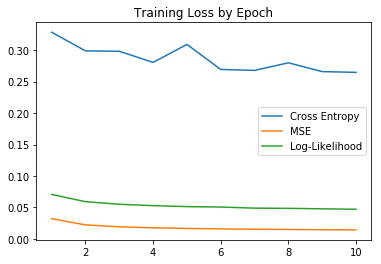

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(1, 10, 10,endpoint=True)
plt.plot(x,t_crossent,label="Cross Entropy")
plt.plot(x,t_mse,label="MSE")
plt.plot(x,t_loglike,label="Log-Likelihood")
plt.title("Training Loss by Epoch")
plt.legend()
plt.show()

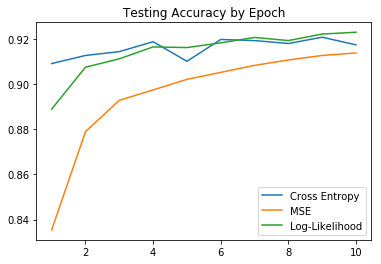

In [34]:
plt.plot(x,e_crossent,label="Cross Entropy")
plt.plot(x,e_mse,label="MSE")
plt.plot(x,e_loglike,label="Log-Likelihood")
plt.title("Testing Accuracy by Epoch")
plt.legend()
plt.show()

***Comments:*** <br>
I was able to run the training and testing function within a for loop for 10 iterations to simulate the model being trained for 10 epochs. I evaluated the training loss and the testing accuracy at each iteration and plotted them above. We see that the training loss for the cross-entropy loss experiment is consistently much higher than the loss for mean squared error and log-likelihood. The mean squared error loss function converges the fastest over 10 epochs. When we look at the testing error, the model fit using mean squared error loss has the worst testing accuracy to begin with, but approaches that of the cross entropy and log-likelihood networks over the 10 epochs. The best test accuracy is seen in the log-likelihood model. Interstingly, we see the most fluctuation in testing accuracy with the cross-entropy loss model. I am not sure why this might be, though we also see it's loss function fluctuates alot as well as it decreases.

### Part 2 - Regularization of the network
***NOTE: I PERFORMED ALL OF THE FOLLOWING EXPERIMENTS ON CROSS-ENTROPY LOSS ONLY***

#### L1 Regularization
Normal, high, and low regularization scaling

In [31]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l1 regularization
    regularizer = tf.contrib.layers.l1_regularizer(scale=0.0001)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with normal l1 regularizer) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp06fe1qln', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3268a828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [18]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l1 regularization
    regularizer = tf.contrib.layers.l1_regularizer(scale=0.8)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with large l1 regularization) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpgit6prwh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c31e379b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [30]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l1 regularization
    regularizer = tf.contrib.layers.l1_regularizer(scale=0.0000000001)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
t = model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with low l1 regularization) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp9nd3rffn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c32708be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

***Comments:***<br>
The first experiment was run with normal regularization (scale of 0.001), this had a final training cost of 0.869 which was larger but not much larger than what we saw in the first experiment of part 1 with unregularized cross-entropy loss. The accuracy however improved to 0.9193, suggesting that this regularization is forcing our network to learn features of the digits better instead of memorizing images and is therefore able to better predict the digits (however, this is not a large improvement in test accuracy). <br>
However, when we increased the regularization parameter to 0.8, the final training loss was on the scale of 8500, which is significantly larger than that of the normal regularized or unregularized cross-entropy loss. As a result, the test accuracy is extremely low (0.1287). This suggests the network weights are being too heavily regualrized and are thus not learning anything about the digits. The predictions are essentially just guesses of what digit each image is (0.1287 ~ 10%). <br>
Finally, we drop the regularization parameter to 0.000000001 ($1*10^-9$). Here we are very lightly regularizing our weights. The loss is therefore very similar to that of our first unregularized experiment (0.276 compared to 0.319, it is likely random error that the loss here is actually less than the unregularized version). Additionally, we see the best test accuracy at 0.9108. Again, the minimal regularization is forcing the weights to learn particualr aspects of the digits well and thus we have very good predictive ability. However, it is possible we are overfitting the training data and memorizing the images more than learning distinct features. <br>
It is important to remember here that L1 regularization is a variable selection regularizer. Because it uses the L1 (absolute value) regularization of the weights, eventually some variable weights will be set to zero. So the high regularization is forcing many weights to zero (essentially eliminating these nodes, similar to dropout).

#### L2 Regularization
Normal, high, and low regularization scaling

In [27]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l2 regularization
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.001)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with normal l2 regularization) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp1cp2ofd0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c32640ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [21]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l2 regularization
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.8)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False) 
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with high l2 regularization) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmp_1u_8bvo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c49e05cc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [28]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss with l2 regularization
    regularizer = tf.contrib.layers.l2_regularizer(scale=0.0000000001)
    weights = tf.trainable_variables()
    reg_term = tf.contrib.layers.apply_regularization(regularizer,weights)
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits) + reg_term

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with low l2 regularization) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpdy62bqdn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c32fcbfd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

***Comments:***<br>
The first experiment was run with normal regularization (scale of 0.001), this had a final training cost of 0.809 which was larger but not much larger than what we saw in the first experiment of part 1 with unregularized cross-entropy loss. The accuracy however improved to 0.9211, suggesting that this regularization is forcing our network to learn features of the digits better instead of memorizing images and is therefore able to better predict the digits (however, this is not a large improvement in test accuracy). <br>
However, when we increased the regularization parameter to 0.8, the final training loss was 2.303, which is significantly larger than that of the normal regularized or unregularized cross-entropy loss. As a result, the test accuracy is extremely low (0.1135). This suggests the network weights are being too heavily regualrized and are thus not learning anything about the digits. The predictions are essentially just guesses of what digit each image is (11.35% ~ 10%). <br>
Finally, we drop the regularization parameter to 0.000000001 ($1*10^-10$). Here we are very lightly regularizing our weights. The loss is therefore similar to that of our first unregularized experiment (0.568 compared to 0.319), but not quite as similar as it was for l1 regularization. Additionally, we see the best test accuracy at 0.9113. Again, the minimal regularization is forcing the weights to learn particualr aspects of the digits well and thus we have very good predictive ability. However, it is possible that we are overfitting the training data and memorizing the data instead of learning features of each digit. <br>
L2 regularization uses the l2 norm and is thus not a selection technique like l1 regularization. Many weights are likely shrunk towards zero, but none are actually set to zero.

#### Dropout
Dropout implemented for both hidden layers

In [23]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    keep_prob = tf.Variable(0.5,tf.float32)  # DROP-OUT here
    drop_out1 = tf.nn.dropout(layer_1, keep_prob)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(drop_out1, n_hidden_2)
    keep_prob = tf.Variable(0.5,tf.float32)  # DROP-OUT here
    drop_out2 = tf.nn.dropout(layer_2, keep_prob)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(drop_out2, num_classes)
    return out_layer


# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits)

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with 0.5 dropout for both hidden layers) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpt1ehuqkz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c49d2a2b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `rate` instead of `keep_pro

In [35]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    keep_prob = tf.Variable(0.999,tf.float32)  # DROP-OUT here
    drop_out1 = tf.nn.dropout(layer_1, keep_prob)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(drop_out1, n_hidden_2)
    keep_prob = tf.Variable(0.999,tf.float32)  # DROP-OUT here
    drop_out2 = tf.nn.dropout(layer_2, keep_prob)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(drop_out2, num_classes)
    return out_layer


# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits)

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with 0.0001 dropout for both hidden layers) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpca9q_4fe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c329e8ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

In [34]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    keep_prob = tf.Variable(0.05,tf.float32)  # DROP-OUT here
    drop_out1 = tf.nn.dropout(layer_1, keep_prob)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(drop_out1, n_hidden_2)
    keep_prob = tf.Variable(0.05,tf.float32)  # DROP-OUT here
    drop_out2 = tf.nn.dropout(layer_2, keep_prob)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(drop_out2, num_classes)
    return out_layer


# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    # Build the neural network
    logits = neural_net(features)

    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)

    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    # TODO: IMPLEMENT THIS FUNCTION
    # Define loss and optimizer
    # Compare the use of squared loss, cross entropy loss, and softmax with log-likelihood
    #*****Start added code
    #This is the cross entropy loss
    loss_op = tf.losses.sparse_softmax_cross_entropy(labels=tf.cast(labels,tf.int32), logits=logits)

    #Optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(
            loss=loss_op,global_step=tf.train.get_global_step())
    #*****Finished added code
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

# Build the Estimator
model = tf.estimator.Estimator(model_fn)

# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=5, shuffle=True)
# Train the Model
model.train(input_fn)


# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
e = model.evaluate(input_fn)

print("Cross Entropy Loss (with 0.95 dropout for both hidden layers) - Testing Accuracy:", e['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/cg/20d347zx177br5p9q52b5bwm0000gn/T/tmpeqc20hs_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3238e9e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Che

***Comments:***
Like I mentioned above in the l1 regualrization experiments, these two are similar in some ways. Because l1 regularization is a selection technique in addition to a regualrization term, it effectively removes different nodes by setting their weights to zero. Although the weights are set to zero as the model is trained (unlike how the are dropped before hand in the dropout method above), both methods result in some of the nodes not being included in the network (i.e. the network is not dense). <br>
In the first experiment, I used 0.5 keep probability for both hidden layers. The resulting network had an initial loss of 3.03 and final training loss of 0.151 with a testing accuracy of 0.9167. With half of the hidden nodes eliminated, the network still had high predictive value after 5 epochs of training. The network's hidden layers are being forced to learn important features of each image since their are only 128 nodes per hidden layer now. However, with this many nodes the network still learns extremely well (recall in problem 1 that with no hidden layers at all the accuracy was roughly 91%). <br>
When I increased the keep probability to 0.999, we saw very similar results. The training loss decreased from 2.427 to 0.420 with a testing accuracy of 0.9179. Here, we essentially have a fully connected dense network, and thus our network is able to perform the best. We do not have any sense of overfitting, but is very possible that over a longer number of epochs we could see signs of overfitting and a decreasing test accuracy. <br>
The final experiment was with 0.05 keep rate. This means that only 12-13 nodes were kept in each hidden layer. Here the training loss starts much higher at 16.446, but eventually decreases to 0.194 after the 5 epochs of training. The final test accuracy is 0.9112. It is interesting that with so many missing nodes that the network still performs so well. Very quickly, the network is trained to have a very reasonable cost. We do see slightly worse test accuracy compared to the previous networks, but still around 91%. Therefore, training a smaller network is much more computationally efficient but still results in similar accuracy results. *Note: I tried to set the keep rate to 0.03 and lower, but got an error saying cost was NaN, I'm guessing this just means that the initial cost was too high to continue the training process.*